## 投資小幫手
### 利用DataReader從yahoo finance抓取歷史股價資料，當所選擇的股票當天股價震動幅度大於篩選標準，便會跳出該支股票在yahoo股市的相關新聞
#### 篩選標準：歷史平均報酬與波動度(標準差)

In [12]:
conda install pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import numpy as np
import pandas as pd
from math import sqrt

import pandas_datareader.data as web
from pandas import Series, DataFrame
from pylab import plot,show
import pandas_datareader as dr

from time import strftime
from datetime import datetime, timedelta

import requests
from bs4 import BeautifulSoup
from urllib.parse import quote

In [17]:
egg = input("Stock Ticker: ")

Stock Ticker: 2330.TW


## Moving Average

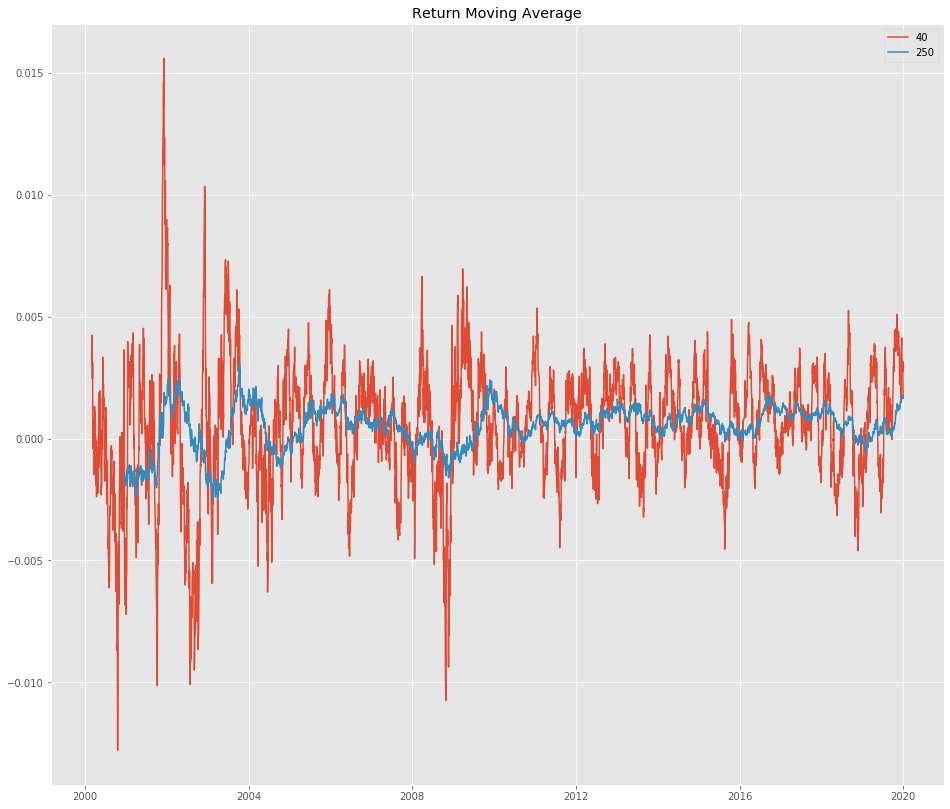

In [39]:
start = datetime(1999, 1, 1)
datetime.now().strftime('%Y-%m-%d')
end = datetime.now()

df = web.DataReader(egg, 'yahoo', start, end)
df.tail()

#從data frame取出"Close"的欄位(收盤價)
P = df["Close"]

# return calculation
pct_change = P.pct_change()
moving_return_40 = pct_change.rolling(window=40).mean()
moving_return_250 = pct_change.rolling(window=250).mean()
# return graph
mpl.rc('figure', figsize=(16, 14))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

plt.title('Return Moving Average')
plt.plot(moving_return_40, label='40')
plt.plot(moving_return_250, label='250')
plt.legend()

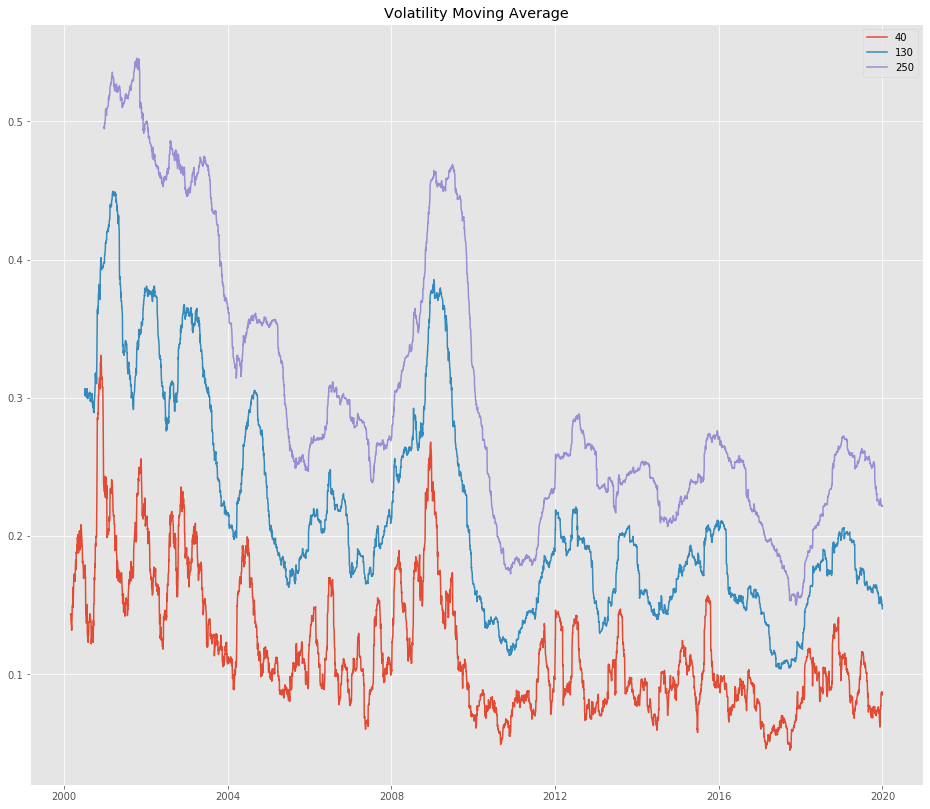

In [40]:
window_40 = 40
window_130 = 130
window_250 = 250
# volatility calculation
moving_vol_40 = pct_change.rolling(window_40).std() * np.sqrt(window_40)
moving_vol_130 = pct_change.rolling(window_130).std() * np.sqrt(window_130) 
moving_vol_250 = pct_change.rolling(window_250).std() * np.sqrt(window_250) 
avg_vol = vol.mean

# voloatilty graph
mpl.rc('figure', figsize=(16, 14))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

plt.title('Volatility Moving Average')
plt.plot(moving_vol_40, label='40')
plt.plot(moving_vol_130, label='130')
plt.plot(moving_vol_250, label='250')
plt.legend()

returns = pd.DataFrame(moving_return_40)
returns.columns = ['Returns']
returns['Volatility'] = moving_vol_40
returns.dropna(inplace = True)

#format the data as a numpy array 
x = np.array([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [41]:
returns

,Returns,Volatility
Date,,
2000-02-29,0.003292,0.143345
2000-03-01,0.003352,0.143694
2000-03-02,0.003538,0.142541
2000-03-03,0.004240,0.138868
2000-03-06,0.003003,0.136536
...,...,...
2019-12-25,0.002745,0.086644
2019-12-26,0.002829,0.086468
2019-12-27,0.003162,0.087310


In [45]:
F_return = x[-1,0:1]
F_vol = x[-1,1:2]
y = x.mean(axis=0)
A_return = y[0]
A_vol = y[1]

### 爬蟲抓取新聞
#### 台積電今日股價報酬率或波動率大於歷史平均，因此抓出了相關新聞給使用者，讓使用者能快速了解市場的狀況

In [46]:
keyword = egg

if F_return > A_return or F_vol > A_vol:
    html = requests.get('https://tw.stock.yahoo.com/news_search.html?ei=Big5&q='+quote(keyword.encode('Big5')))
    # print(html.text)
    s = BeautifulSoup(html.text, 'html.parser')
    # print(s)
    tag_egg = []
    for i in s.find_all('a', class_='mbody'):
        if len(i.contents) != 0:
            tag_egg.append(i.contents)
    for i in tag_egg:
        print(i)

['台積電代理發言人孫又文退休 由公關部經理高孟華接任']
['台股盤後─外資回頭買台積電撐盤 開高走高周線連四紅']
['降價搶市占？傳三星計畫下調晶圓代工服務價格']
['台股盤中─外資缺席估量不到千億元 中小型股籌碼優勢活躍表態']
['後台積電的選股心法']
['〈熱門股〉搭半導體設備出貨潮 亞翔周漲逾13%創15個月新高']
['年底法人大換股 找2020新主流']
['台積電貼息「萬二」曇花一現 投信看好選前盤勢中性偏多']
['盤前財經大事搶先讀2019年12月20日']
['精測終止特定PCB生產 資產減損不超過1億元 全年仍可賺逾1股本']
